## 1 - sample

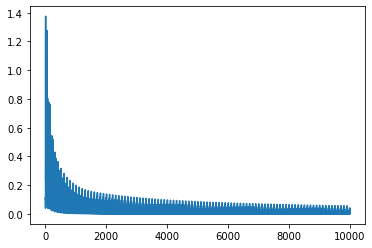

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y*np.log(h) - (1-y)*np.log(1-h))

def predict(X, theta):
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y))

lr = 0.1
num_iter = 100

theta = np.array([0.1, 0.5, -0.1])
losses = []
accs   = []

for epoch in range(num_iter):
    for i in range(X.shape[0]):
        # get a sample
        xi = X[i]
        yi = y[i]

        # predict z
        y_hat = predict(xi, theta)

        # compute loss
        loss = loss_function(y_hat, yi)

        # compute mean of gradient
        gradient = compute_gradient(xi, y_hat, yi)

        theta -= lr * gradient
        #print('new theta: ', theta)

        # for debug
        if(i%1 == 0):
            # loss
            losses.append(loss)

            # accuracy for training
            preds = predict(xi, theta).round()
            acc = (preds == yi).mean()
            accs.append(acc)        

# show figures
plt.plot(losses)
plt.show()

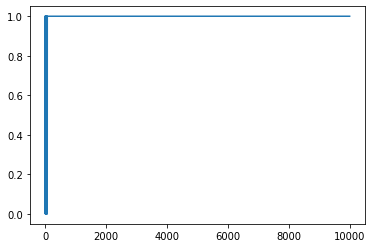

In [ ]:
plt.plot(accs)
plt.show()

In [ ]:
preds = predict(X, theta).round()
print(preds)
print(y)
print('acc: %d%%' % ((preds == y).mean() * 100))

[1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0.]
[1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0.]
acc: 100%


## m - sample

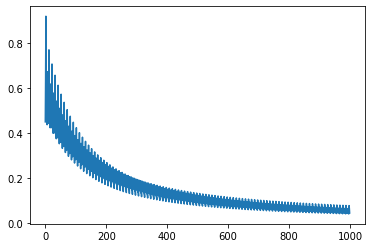

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()

def predict(X, theta):
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)) / y.size

lr = 0.1
num_iter = 100
BATCH_SIZE = 10

theta = np.array([0.1, 0.5, -0.1])
losses = []
accs   = []

for epoch in range(num_iter):
    for i in range(0, X.shape[0], BATCH_SIZE):
        # get m sample
        xm = X[i:i+BATCH_SIZE]
        ym = y[i:i+BATCH_SIZE]

        # predict z
        y_hat = predict(xm, theta)

        # compute loss
        loss = loss_function(y_hat, ym)

        # compute mean of gradient
        gradient = compute_gradient(xm, y_hat, ym)

        theta -= lr * gradient
        #print('new theta: ', theta)

        # for debug
        if(i%1 == 0):
            # loss
            losses.append(loss)

            # accuracy for training
            preds = predict(xm, theta).round()
            acc = (preds == ym).mean()
            accs.append(acc)        

# show figures
plt.plot(losses)
plt.show()

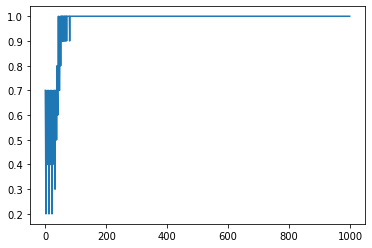

In [ ]:
plt.plot(accs)
plt.show()

In [ ]:
preds = predict(X, theta).round()
print(preds)
print(y)
print('acc: %d%%' % ((preds == y).mean() * 100))

[1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0.]
[1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0.]
acc: 100%
